# Numerical Estimation of Rodenticide Density
## Calibration Demonstration

In [1]:
import nerd
import nerd.calibration
import nerd.density_functions

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Fit flow rate

In [3]:
flow_data = pd.read_csv("data/flujo.csv")
flow_data = flow_data[flow_data.estado_cebo == "nuevo"][["apertura","flujo"]]

In [4]:
aperture_diameters = flow_data.apertura.values
flow_rates = flow_data.flujo.values
flow_rate_function = nerd.calibration.fit_flow_rate(aperture_diameters, flow_rates)

Text(0, 0.5, 'Mass flow rate (kg/s)')

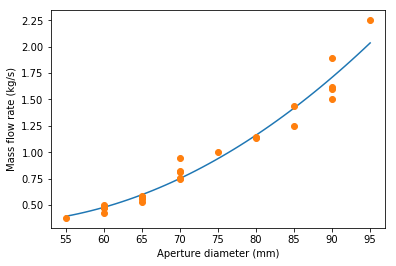

In [5]:
x = np.linspace(min(aperture_diameters),max(aperture_diameters))
y = flow_rate_function(x)
plt.plot(x,y)
plt.plot(aperture_diameters, flow_rates, 'o')
plt.xlabel("Aperture diameter (mm)")
plt.ylabel("Mass flow rate (kg/s)")

## Swath width

In [6]:
density_profile = pd.read_csv("data/perfil.csv")

In [7]:
distance = density_profile.distancia.values
density_kg_per_ha = density_profile.densidad.values
density = density_kg_per_ha / 1e4 # To convert densities to kg per square meter
swath_width = nerd.calibration.get_swath_width(distance, density)

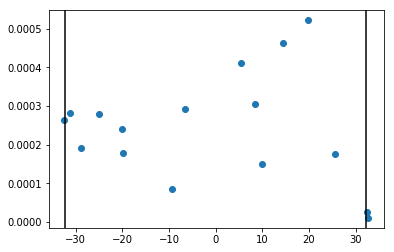

In [8]:
plt.plot(distance, density, 'o')
plt.axvline(-swath_width/2, color="k")
plt.axvline(swath_width/2, color="k")

## Select best density function

In [9]:
aperture_diameter_data = 55 # milimetres
helicopter_speed_data = 20.5778 # meters per second (40 knots)

In [10]:
density_function = nerd.calibration.get_best_density_function(distance, density, aperture_diameter_data, helicopter_speed_data, swath_width, flow_rate_function)
estimated_profile = nerd.solver(aperture_diameter_data, helicopter_speed_data, swath_width, density_function, flow_rate_function)

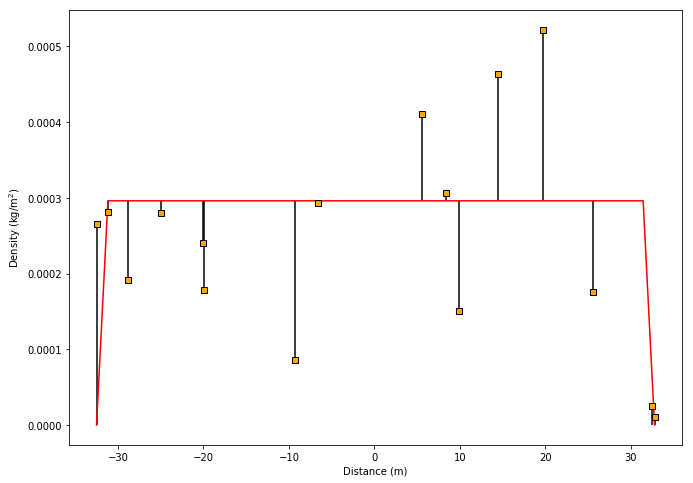

In [11]:
x = np.linspace(min(distance), max(distance))
y = estimated_profile(x)
estimated_density = estimated_profile(distance)
plt.figure(figsize=[11,8])
plt.plot(x, y, 'r', label="estimated density")
plt.vlines(distance, density, density + estimated_density - density, 'k')
plt.plot(distance, density, 's', color="orange", markeredgecolor="black", label="real density")
plt.xlabel("Distance (m)");
plt.ylabel("Density (kg/m$^2$)");

## Calibration model

In [12]:
aperture_diameters_domain = np.linspace(min(aperture_diameters),max(aperture_diameters))
helicopter_speeds_domain = np.linspace(10,40)
density_matrix = nerd.calibration.model(aperture_diameters_domain,helicopter_speeds_domain,swath_width,nerd.density_functions.uniform,flow_rate_function)

/home/efren/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


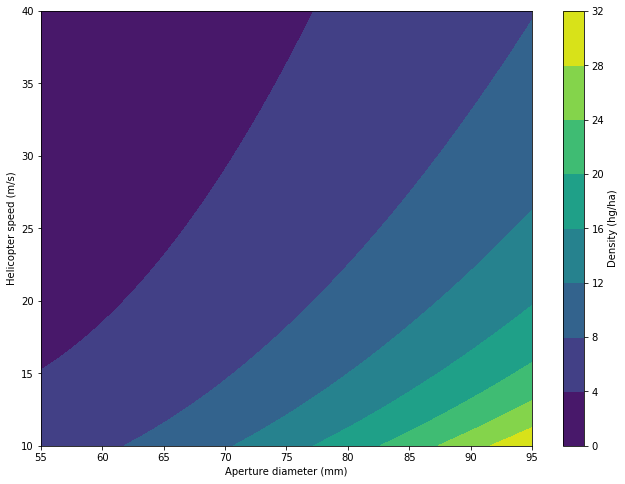

In [13]:
plt.figure(figsize=[11,8])
plt.contourf(aperture_diameters_domain, helicopter_speeds_domain, density_matrix*1e4)
plt.xlabel("Aperture diameter (mm)")
plt.ylabel("Helicopter speed (m/s)")
plt.colorbar(label="Density (hg/ha)")